In [530]:
# loading required libraries
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [531]:
# loading integrated dataset
data = pd.read_csv("integrated_data.csv")
data.head()

,area_code,area,year_code,year,item_code,item,producer_price,producer_price_index,area_harvested,laying,...,total_pesticide_use_per_value_of_agri_production,total_pesticide_export_quantity,total_pesticide_export_value,total_pesticide_import_quantity,total_pesticide_import_value,temp_change_dec_jan_feb,temp_change_mar_apr_may,temp_change_jun_jul_aug,temp_change_sep_oct_nov,temp_change_meteorological_year
0,1,Armenia,1997,1997,15,Wheat,225.3,89.40,108000.0,NaN,...,0.05,3.604,3.687,117.861,298.379,2.166,-0.319,0.870,0.184,0.725
1,1,Armenia,1998,1998,15,Wheat,205.6,83.91,118300.0,NaN,...,0.06,3.604,3.687,207.171,340.124,-0.259,1.483,2.145,2.027,1.349
2,1,Armenia,1999,1999,15,Wheat,177.5,76.79,110129.0,NaN,...,0.07,3.604,3.687,296.481,381.869,3.535,0.814,1.611,0.264,1.556
3,1,Armenia,2000,2000,15,Wheat,163.5,71.30,106581.0,NaN,...,0.08,3.604,3.687,160.902,482.955,1.148,0.723,2.166,0.364,1.100
4,1,Armenia,2001,2001,15,Wheat,166.0,74.51,108554.0,NaN,...,0.09,1.145,9.068,200.884,698.022,1.818,2.072,1.578,0.409,1.469


In [532]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392856 entries, 0 to 392855
Data columns (total 116 columns):
 #    Column                                            Dtype  
---   ------                                            -----  
 0    area_code                                         int64  
 1    area                                              object 
 2    year_code                                         int64  
 3    year                                              int64  
 4    item_code                                         int64  
 5    item                                              object 
 6    producer_price                                    float64
 7    producer_price_index                              float64
 8    area_harvested                                    float64
 9    laying                                            float64
 10   milk_animals                                      float64
 11   producing_animals_or_slaughtered                  

In [533]:
# Remove the row-limit so that any Series/DataFrame will print in full
pd.set_option('display.max_rows', None)

In [534]:
# total number of missing values per column
data.isna().sum()

area_code                                                0
area                                                     0
year_code                                                0
year                                                     0
item_code                                                0
item                                                     0
producer_price                                      234985
producer_price_index                                  3062
area_harvested                                      160052
laying                                              383668
milk_animals                                        378227
producing_animals_or_slaughtered                    362410
production                                           85041
yield                                               137470
yield_or_carcass_weight                             362643
gross_production_value                              158536
gross_production_index                              1476

In [535]:
# proportion of missing values for each column
prop_na_merged = data.isna().mean().sort_values(ascending=False)*100
prop_na_merged.head(10)

laying                                  97.661230
milk_animals                            96.276244
terms_of_trade                          96.191734
import_market_concentration_index       95.509041
export_market_concentration_index       95.460932
import_dependency_ratio                 95.230568
self_sufficiency_ratio                  95.230568
revealed_comparative_advantage_index    94.950058
yield_or_carcass_weight                 92.309396
producing_animals_or_slaughtered        92.250087
dtype: float64

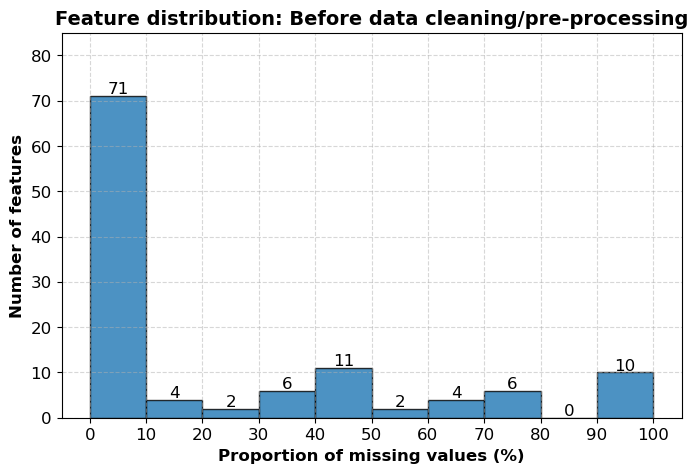

In [536]:
# Histogram to better understand the proportion of missing values in the columns
plt.figure(figsize=(8,5))

# plot histogram and get the counts and bin edges
counts, edges, bars = plt.hist(
    prop_na_merged,
    bins = list(range(0,101,10)),
    alpha = 0.8,
    edgecolor = 'black'
)
# add frequency labels above bars
for count, edge in zip(counts, edges[:-1]):
    plt.text(edge + 5, count + 0.5, str(int(count)), ha='center', fontsize=12)

plt.title('Feature distribution: Before data cleaning/pre-processing', fontsize=14, fontweight='bold')
plt.xlabel('Proportion of missing values (%)', fontsize=12, fontweight='bold')
plt.ylabel('Number of features', fontsize=12, fontweight='bold')
plt.xticks(list(range(0,101,10)), fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,85)
plt.grid(linestyle='--', alpha=0.5)

# saving plot as png image
plt.savefig('plots/feat_dist_pre_clean.png', dpi=360, bbox_inches='tight')

plt.show()

Out of 116 features in the integrated dataset, 22 of them have missing values 
over 50%. Whereas, 75 features have missing values below 20%. There are 10 features 
with over 90% missing values. 

We have to deal with the missing values before we train our models. 

The top 10 columns having highest missing values are: 

1. laying                                  (97.66%)
2. milk_animals                            (96.27%)
3. terms_of_trade                          (96.19%)
4. import_market_concentration_index       (95.50%)
5. export_market_concentration_index       (95.46%)
6. self_sufficiency_ratio                  (95.23%)
7. import_dependency_ratio                 (95.23%)
8. revealed_comparative_advantage_index    (94.95%)
9. yield_or_carcass_weight                 (92.30%)
10. producing_animals_or_slaughtered        (92.25%)

We will definitely remove these 10 features having missing values over 90%. We don't have 
ways to safely impute so many missing values in a column without introducing bias. 

In [538]:
# proportion of missing values for each column
prop_na_merged = data.isna().mean().sort_values(ascending=False)*100
prop_na_merged.head(20)

laying                                  97.661230
milk_animals                            96.276244
terms_of_trade                          96.191734
import_market_concentration_index       95.509041
export_market_concentration_index       95.460932
import_dependency_ratio                 95.230568
self_sufficiency_ratio                  95.230568
revealed_comparative_advantage_index    94.950058
yield_or_carcass_weight                 92.309396
producing_animals_or_slaughtered        92.250087
export_quantity_index                   78.298919
export_value_index                      78.153318
import_quantity_index                   74.539780
import_value_index                      74.377125
fdi_food_industry_share                 73.245922
fdi_food_industry                       73.245922
fdi_ag_forest_fish_share                63.296984
fdi_ag_forest_fish                      63.296984
share_of_agri_exports_to_gdp            62.332763
agri_trade_openness_index               62.332763


In addition to the 10 features with over 90% missing values, we also need to evaluate the 35 features with missing values between 10% and 90%. Our goal is to retain as many of these columns as possible, as we aim to minimize data loss.

The strategy involves identifying patterns of missingness across these columns—specifically, whether the missing data is concentrated in certain rows. This approach is based on the assumption that for specific food items and countries, data may be consistently unavailable. By removing such rows, we may be able to preserve a greater number of these columns for analysis.

In [539]:
# Selecting the columns with missing values between 10 and 90 %
feature_list_subset = list(prop_na_merged.loc[(prop_na_merged.values > 10) & (prop_na_merged.values < 90)].index)
len(feature_list_subset)

35

There are 35 columns out of 116 having missing data between 10% and 90%.

In [540]:
feature_list_subset[0:6]

['export_quantity_index',
 'export_value_index',
 'import_quantity_index',
 'import_value_index',
 'fdi_food_industry_share',
 'fdi_food_industry']

The original dataset contains a total of 166 countries and 202 items. To investigate the middle 35 columns—those with missing values ranging between 10% and 90%—we need to identify the specific countries and items for which these columns have available data. This step is essential to determine whether the overall missingness in these columns can be reduced by removing countries and items lacking sufficient data. However, this strategy may not always be feasible. Therefore, our first objective is to identify the countries and items that contribute most to the missing data in these 35 columns.

In [541]:
# Initialize empty lists to store the number of countries and items with 
# non-missing values for each of the 36 selected columns
Number_of_countries = []
Number_of_items = []

# Iterate over each feature in the selected subset of features
for feature in feature_list_subset:
    # count number of unique countries where this feature is not missing
    num_of_countries = len(data.loc[data[feature].notna()]['area'].unique())
    Number_of_countries.append(num_of_countries)

    # count number of unique items where this feature is not missing
    num_of_items = len(data.loc[data[feature].notna()]['item'].unique())
    Number_of_items.append(num_of_items)

# create a dataframe to summarize the number of non-missing countries and items 
# for each feature
df = pd.DataFrame({
    'Feature': feature_list_subset,
    'Number_of_countries': Number_of_countries,
    'Number_of_items': Number_of_items
})

# print the entire dataframe without row indices
print(df.to_string(index=False))

                                   Feature  Number_of_countries  Number_of_items
                     export_quantity_index                  161               51
                        export_value_index                  161               51
                     import_quantity_index                  163               51
                        import_value_index                  163               51
                   fdi_food_industry_share                   71              197
                         fdi_food_industry                   71              197
                  fdi_ag_forest_fish_share                  101              201
                        fdi_ag_forest_fish                  101              201
              share_of_agri_exports_to_gdp                  156              202
                 agri_trade_openness_index                  156              202
                            producer_price                  162              185
        govt_expenditure_on_

As shown in the dataframe above, which summarizes the middle 35 features out of a total of 117 in our integrated dataset, we can begin to assess which of these columns are worth retaining and which might need to be removed.

For each of the 36 columns, we have listed the number of countries and items for which data (atleast some) is available. This was important because the missing values in these columns are associated with specific combinations of countries and items.

The dataset contains 166 countries and 202 items in total. For example, the column "fdi_ag_forest_fish" has approximately 63% missing values. Upon inspection, it has data for only 101 countries but covers almost all items, suggesting that the missingness is primarily due to the absence of country-level data.

In contrast, some other columns with high missingness have data for as few as 51 items, indicating that they are largely incomplete at the item level. These columns are strong candidates for removal, as imputing such a large volume of missing values may not be justified.

However, before discarding these columns entirely, one possible strategy is to remove rows related to animal and animal product items. This makes logical sense, as four of the top 10 features with more than 90% missing data were related to such items—specifically: 'laying', 'milk_animals', 'yield_or_carcass_weight', and 'producing_animals_or_slaughtered'.

Therefore, the next step is to identify and remove rows corresponding to these items and any countries with systematically missing data, in an effort to preserve more features for analysis.

### Removing undesired items

Let's begin by focusing on the columns that have data available for 150 to 190 items. We aim to retain these columns by selectively removing specific items for which most of these columns lack data.

On the other hand, columns with data for fewer than 100 items will be dropped, as removing a large number of items or imputing such extensive missing data is not desirable. Columns that contain data for more than 190 items are considered reliable and will be retained without modification.

In [542]:
# filtering rows where number of items lie between 150 and 190
df_items = df.loc[(df['Number_of_items'] > 150) & (df['Number_of_items'] < 190)]
df_items

,Feature,Number_of_countries,Number_of_items
10,producer_price,162,185
12,export_quantity,164,157
13,export_value,164,157
15,import_quantity,165,158
19,import_value,165,158
22,gross_production_value,158,170
23,gross_production_index,164,155
25,yield,166,153
30,production,166,179


In [544]:
items = list(data['item'].unique())
items[40:60]

['Raw milk of cattle',
 'Meat of cattle with the bone, fresh or chilled (biological)',
 'Meat of sheep, fresh or chilled',
 'Raw milk of sheep',
 'Shorn wool, greasy, including fleece-washed shorn wool',
 'Meat of sheep, fresh or chilled (biological)',
 'Raw milk of goats',
 'Meat of pig with the bone, fresh or chilled',
 'Meat of pig with the bone, fresh or chilled (biological)',
 'Pulses, Total',
 'Meat of chickens, fresh or chilled',
 'Hen eggs in shell, fresh',
 'Meat of chickens, fresh or chilled (biological)',
 'Meat of rabbits and hares, fresh or chilled',
 'Meat of rabbits and hares, fresh or chilled (biological)',
 'Natural honey',
 'Cereals, primary',
 'Roots and Tubers, Total',
 'Treenuts, Total',
 'Vegetables Primary']

In [545]:
# removing items related to animals or animal-based products
keywords = [
    'meat', 'milk', 'eggs', 'wool', 'leather', 'animals', 'birds', 'cattle', 
    'honey', 'silk-worm', 'livestock', 'beeswax'
]

animal_related_items = []

for item in items:
    if any(keyword in item.lower() for keyword in keywords):
        animal_related_items.append(item)

print(f"Number of animal related items: {len(animal_related_items)}")



Number of animal related items: 43


In [79]:
animal_related_items[0:10]

['Meat of cattle with the bone, fresh or chilled',
 'Raw milk of cattle',
 'Meat of cattle with the bone, fresh or chilled (biological)',
 'Meat of sheep, fresh or chilled',
 'Raw milk of sheep',
 'Shorn wool, greasy, including fleece-washed shorn wool',
 'Meat of sheep, fresh or chilled (biological)',
 'Raw milk of goats',
 'Meat of pig with the bone, fresh or chilled',
 'Meat of pig with the bone, fresh or chilled (biological)']

In [546]:
# filtering rows by excluding animal related items
filtered_data_1 = data.loc[~data['item'].isin(animal_related_items)]
len(filtered_data_1['item'].unique())

159

In [547]:
# list of problematic features (items between 150 and 190) 
features_items = list(df_items['Feature'].unique())

# initializing an empty list for the items to be removed
items_to_remove = []

for feature in features_items:
    # list containing items for which the corresponding features has at least some data
    item_list = list(filtered_data_1.loc[filtered_data_1[feature].notna()]['item'].unique())
    # list of total items
    total_items = list(filtered_data_1['item'].unique())
    # list of items for which the feature has no data at all
    remaining_items = list(set(total_items) - set(item_list))
    # adding these to the list of items to be removed
    items_to_remove += remaining_items

# converting list to set in order to keep unique items only
items_to_remove = set(items_to_remove)
len(items_to_remove)

31

In [548]:
# converting set back to list
items_to_remove = list(items_to_remove)
items_to_remove

['String beans',
 'Brazil nuts, in shell',
 'Cereals, primary',
 'Citrus Fruit, Total',
 'Bananas cavendish',
 'Vegetables&Melons, Total',
 'Agriculture',
 'Cashewapple',
 'Flax, processed but not spun',
 'Peppermint, spearmint',
 'Ramie, raw or retted',
 'Tung nuts',
 'Mushrooms and truffles',
 'Palm oil',
 'Oilcrops, Oil Equivalent',
 'Vegetables Primary',
 'Agave fibres, raw, n.e.c.',
 'Cotton seed',
 'Fruit excl Melons, Total',
 'Cotton lint, ginned',
 'Fruit Primary',
 'Coarse Grain, Total',
 'Jute & Jute-like Fibres',
 'Palm kernels',
 'Pulses, Total',
 'True hemp, raw or retted',
 'Roots and Tubers, Total',
 'Treenuts, Total',
 'Plantains',
 'Oil palm fruit',
 'Seed cotton, unginned']

In [549]:
# filtering the items where there is least amount of data
filtered_data_1['item'].value_counts().sort_values(ascending=True).head(15)

item
True hemp, raw or retted     101
Peppermint, spearmint        102
Quinoa                       102
Maté leaves                  102
Cashewapple                  102
Kola nuts                    116
Bambara beans, dry           118
Bananas cavendish            131
Abaca, manila hemp, raw      136
Brazil nuts, in shell        136
Ramie, raw or retted         136
Pyrethrum, dried flowers     136
Agave fibres, raw, n.e.c.    170
Plantains                    198
Tung nuts                    199
Name: count, dtype: int64

In [550]:
# keeping certain items from the list of items to be removed. 
# These are important items having significant amount of data for other columns.
items_to_keep = [
    'Oilcrops, Oil Equivalent', 'Cotton seed', 'Cotton lint, ginned',
    'Seed cotton, unginned', 'Palm oil', 'Flax, processed but not spun'
    ]

items_to_remove = list(set(items_to_remove) - set(items_to_keep))
len(items_to_remove)

25

In [551]:
# filtering rows by excluding the items in the items_to_remove list
filtered_data_2 = filtered_data_1.loc[
    (~filtered_data_1['item'].isin(items_to_remove))
]

len(filtered_data_2['item'].unique())

134

So, we end up retaining 134 items out of the total 202 items in the dataset.

### Removing problematic countries (significant amount of missing data)

Just as we removed undesired items earlier, we will now identify and remove certain countries that have substantial missing data across key features. To begin, we will focus on features that contain data for 100 to 131 countries. These features will help us pinpoint countries with significant missing values across most variables.

Features with data available for fewer than 100 countries will be excluded, as retaining them would require removing too many countries from our dataset or performing extensive imputation—both of which we aim to avoid. 

In [552]:
# creating list of features having at least some data for 100 to 131 countries
req_features = [
    'govt_expenditure_on_ag_forest_fish',
    'fdi_ag_forest_fish',
    'credit_to_ag_forest_fish_2015_usd',
    'afs_employment_share_in_total_employment'
    ]
req_features

['govt_expenditure_on_ag_forest_fish',
 'fdi_ag_forest_fish',
 'credit_to_ag_forest_fish_2015_usd',
 'afs_employment_share_in_total_employment']

In [553]:
# Initialize a counter to keep track of how many times each country appears with
#  missing data
country_missing_count = Counter()

# Initialize a set to store all unique countries that have missing values for 
# at least one feature
problem_countries = set()

# Iterate through each feature of interest
for feature in req_features:
    # Group the dataset by 'area' (i.e., country), and check if all values 
    # for this feature are missing within each country
    missing_countries = filtered_data_2.groupby('area')[feature].apply(
        lambda x: x.isna().all()
    )

    # Extract the list of countries where all values for the current feature are 
    # missing
    nan_countries = missing_countries.loc[missing_countries == True].index.tolist()

    # Add these countries to the set of problem countries
    problem_countries.update(nan_countries)

    # Update the counter with countries having all missing values for this feature
    country_missing_count.update(nan_countries)

print(
    f"Total number of unique countries with missing values for at least one "
    f"of these columns: {len(problem_countries)}"
    )


Total number of unique countries with missing values for at least one of these columns: 106


Out of the 166 countries in the dataset, 106 have all data missing for at least one of the 4 features of interest. However, we will not remove all of these countries. Instead, we will apply a threshold: any country missing data for all values in 2 or more of the 4 features will be removed from the dataset.

In [554]:
print(country_missing_count.items())

dict_items([('Eritrea', 4), ('Ethiopia', 1), ('Iran (Islamic Republic of)', 1), ('New Zealand', 2), ('Palestine', 3), ('Philippines', 1), ('Puerto Rico', 4), ('Serbia and Montenegro', 4), ('Sudan (former)', 4), ('Syrian Arab Republic', 2), ('Uruguay', 2), ('Venezuela (Bolivarian Republic of)', 4), ('Afghanistan', 1), ('Angola', 1), ('Antigua and Barbuda', 2), ('Azerbaijan', 2), ('Bahrain', 2), ('Barbados', 1), ('Belarus', 1), ('Benin', 2), ('Botswana', 1), ('Brunei Darussalam', 2), ('Burkina Faso', 2), ('Burundi', 1), ('Cabo Verde', 1), ('Cameroon', 3), ('Canada', 1), ('Central African Republic', 3), ('Chad', 2), ('China, Hong Kong SAR', 2), ('Congo', 3), ('Cook Islands', 2), ('Cuba', 3), ('Dominican Republic', 1), ('Equatorial Guinea', 3), ('Gambia', 1), ('Grenada', 1), ('Guinea', 3), ('Guinea-Bissau', 1), ('Guyana', 1), ('Iraq', 1), ('Jamaica', 1), ('Kuwait', 3), ('Lebanon', 1), ('Luxembourg', 2), ('Maldives', 1), ('Mali', 1), ('Namibia', 1), ('New Caledonia', 2), ('Niger', 1), ('Oma

In [558]:
# Set the threshold to remove countries
threshold = 1

# Initialize a list to store the countries that exceed the missing data threshold
countries_to_remove = []

# Iterate through the dictionary of countries and their corresponding missing feature counts
for country, count in country_missing_count.items():
    # If a country is missing all data for more than 1 features, mark it for removal
    if count > threshold:
        countries_to_remove.append(country)

print(
    f"Total number of countries to be removed: {len(countries_to_remove)}"
)

print(countries_to_remove)

Total number of countries to be removed: 42
['Eritrea', 'New Zealand', 'Palestine', 'Puerto Rico', 'Serbia and Montenegro', 'Sudan (former)', 'Syrian Arab Republic', 'Uruguay', 'Venezuela (Bolivarian Republic of)', 'Antigua and Barbuda', 'Azerbaijan', 'Bahrain', 'Benin', 'Brunei Darussalam', 'Burkina Faso', 'Cameroon', 'Central African Republic', 'Chad', 'China, Hong Kong SAR', 'Congo', 'Cook Islands', 'Cuba', 'Equatorial Guinea', 'Guinea', 'Kuwait', 'Luxembourg', 'New Caledonia', 'Oman', 'Qatar', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'Sierra Leone', 'South Africa', 'Turkmenistan', 'Uzbekistan', 'Yemen', 'Zimbabwe', 'Algeria', 'Paraguay', 'Saudi Arabia']


In [563]:
# Filter rows to exclude countries in the countries_to_remove list
filtered_data_3 = filtered_data_2.loc[~(filtered_data_2['area'].isin(countries_to_remove))]
len(filtered_data_3['area'].unique())

124

So, finally we end up retaining 124 countries out of the 166 total countries.

In [560]:
# proportion of missing values for each column
prop_na_filtered_3 = filtered_data_3.isna().mean().sort_values(ascending=False)*100
prop_na_filtered_3.head(30)

producing_animals_or_slaughtered              100.000000
yield_or_carcass_weight                       100.000000
laying                                        100.000000
milk_animals                                  100.000000
terms_of_trade                                 93.468178
import_market_concentration_index              92.509931
export_market_concentration_index              92.420657
import_dependency_ratio                        92.016017
self_sufficiency_ratio                         92.016017
revealed_comparative_advantage_index           91.543760
export_quantity_index                          72.842624
export_value_index                             72.734332
import_quantity_index                          70.246799
import_value_index                             70.129527
fdi_food_industry                              68.584393
fdi_food_industry_share                        68.584393
share_of_agri_exports_to_gdp                   60.477856
agri_trade_openness_index      

In [564]:
# Removing the top 17 features with significantly high amounts of missing data
columns_to_drop = list(prop_na_filtered_3.keys()[0:18])
columns_to_drop

['producing_animals_or_slaughtered',
 'yield_or_carcass_weight',
 'laying',
 'milk_animals',
 'terms_of_trade',
 'import_market_concentration_index',
 'export_market_concentration_index',
 'import_dependency_ratio',
 'self_sufficiency_ratio',
 'revealed_comparative_advantage_index',
 'export_quantity_index',
 'export_value_index',
 'import_quantity_index',
 'import_value_index',
 'fdi_food_industry',
 'fdi_food_industry_share',
 'share_of_agri_exports_to_gdp',
 'agri_trade_openness_index']

In [565]:
# Dropping the undesired columns from that dataset
filtered_data_4 = filtered_data_3.drop(columns_to_drop, axis = 1)
filtered_data_4.shape

(189304, 98)

In [566]:
# Calculate the percentage of missing values for each feature in the dataset
# .isna() returns a boolean DataFrame 
# .mean() computes the proportion of missing values per column
# Multiplying by 100 converts the proportions to percentages
# .sort_values() arranges the features from most to least missing
prop_na_values = filtered_data_4.isna().mean().sort_values(ascending=False)*100

# Select features where the percentage of missing data is between 10% and 60% 
features = prop_na_values.loc[
    (prop_na_values.values > 10) &
    (prop_na_values.values < 61)
]

# Initialize lists to store metadata for each selected feature
countries = []
items = []
feature_list = []

# Loop through each selected feature
for feature in features.index:
    feature_list.append(feature)

    # Count how many unique countries have non-missing values for this feature
    num_countries = len(filtered_data_4['area'].loc[filtered_data_4[feature].notna()].unique())
    countries.append(num_countries)

    # Count how many unique items have non-missing values for this feature
    num_items = len(filtered_data_4['item'].loc[filtered_data_4[feature].notna()].unique())
    items.append(num_items)

# Create a DataFrame summarizing the number of countries and items with data for 
# each selected feature
df_4 = pd.DataFrame({
    'Feature': feature_list,
    'Num_of_countries': countries,
    'Num_of_items': items
})

df_4

,Feature,Num_of_countries,Num_of_items
0,fdi_ag_forest_fish_share,95,133
1,fdi_ag_forest_fish,95,133
2,govt_expenditure_on_ag_forest_fish,121,134
3,producer_price,122,133
4,agri_orientation_index_2015_usd,103,134
5,credit_to_ag_forest_fish_share_totalcredit,103,134
6,credit_to_ag_forest_fish_2015_usd,103,134
7,afs_employment_share_in_total_employment,113,134
8,total_employment_afs,116,134
9,total_govt_expenditure,124,134


In [568]:
# proportion of missing values for each column
prop_na_filtered_4 = filtered_data_4.isna().mean().sort_values(ascending=False)*100
prop_na_filtered_4.head(20)

fdi_ag_forest_fish_share                      57.006191
fdi_ag_forest_fish                            57.006191
govt_expenditure_on_ag_forest_fish            47.790327
producer_price                                44.675760
agri_orientation_index_2015_usd               39.907767
credit_to_ag_forest_fish_share_totalcredit    39.907767
credit_to_ag_forest_fish_2015_usd             39.907767
afs_employment_share_in_total_employment      38.795271
total_employment_afs                          37.964333
total_govt_expenditure                        32.366458
agri_orientation_index_govt_expenditure       32.339517
area_temporary_crops                          32.057960
phosphorus_production                         27.906436
export_quantity                               26.466953
export_value                                  26.245087
gross_production_value                        26.147361
import_quantity                               25.503951
import_value                                  25

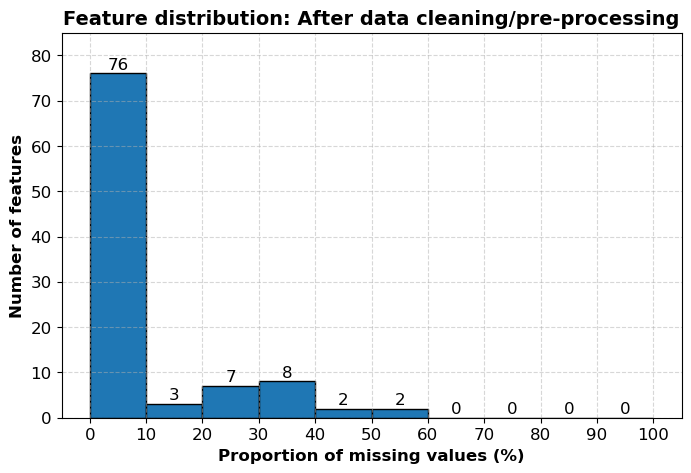

In [569]:
# Understanding amount of missing data among the features through histogram
plt.figure(figsize=(8,5))
counts, edges, bars = plt.hist(
    prop_na_filtered_4, 
    edgecolor='black',
    bins=list(range(0,101,10))
    )
plt.title('Feature distribution: After data cleaning/pre-processing', fontsize=14, fontweight='bold')
plt.xlabel("Proportion of missing values (%)", fontweight='bold', fontsize=12)
plt.ylabel("Number of features", fontweight='bold', fontsize=12)
plt.xticks(list(range(0,101,10)) ,fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,85)
plt.grid(linestyle='--', alpha=0.5)

# adding frequency labels on bars
for count, edge in zip(counts, edges[:-1]):
    plt.text(edge+5, count+1, str(int(count)), ha='center', fontsize=12)

# saving plot as png image
plt.savefig('plots/feat_dist_post_clean.png', dpi=360, bbox_inches='tight')

plt.show()

In [570]:
filtered_data_4.shape

(189304, 98)

After data preprocessing and cleaning, we significantly reduced the number of missing values in the dataset, although some data loss occurred during the process. The original dataset consisted of 392,856 entries and 116 columns. Among these, 71 columns had missing values under 10%, and 94 columns had missing values under 60%. Following the cleaning process, the dataset now contains 189304 entries and 98 columns. Of these, 76 columns have missing values below 10%, and 94 columns have missing values below 40%.

In [575]:
# Exporting cleaned data as csv file
filtered_data_4.to_csv('pre_processed_data.csv', index=False)